In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import math
from collections import namedtuple
from torch import nn
import torch
import torchvision
from torchvision import transforms
import pandas as pd
import sys
import os
import neat
import multiprocessing

In [2]:
x=np.linspace(-3.9375,3.9375,32)
x= x.repeat(32)
x=x.reshape((32,32))
x=np.stack((x,x.transpose()),axis=2)
r=np.sqrt(np.square(x).sum(axis=2))
x=np.append(x,np.expand_dims(r,2),axis=2)

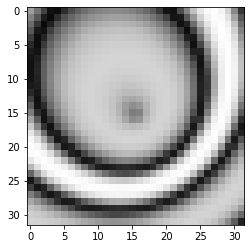

In [3]:
na=[[1,0,0,1,0,0,0,0],
   [1,1,0,1,0,0,0,0],
   [1,0,1,1,0,0,0,0],
   [1,0,0,1,0,0,0,0],
   [0,0,0,0,0,1,0,0],
   [0,0,0,0,1,0,1,0],
   [0,0,0,1,1,1,1,1],
   [0,0,0,1,0,0,0,1]]
im = PIL.Image.open("simple.png")
im1=im.convert("L").resize((32,32))
goal=np.array(im1)/255
goal=np.expand_dims(goal,2)
im.close()
plt.imshow(goal, cmap='Greys_r',vmin=0, vmax=1)

In [4]:
def my_sigmoid(in_):
    return 1/(1 + np.exp(-in_))

In [5]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        myPic = np.empty((32,32,1))     
        for i in range(32*32):
            myPic[i%32][int(i/32)] = net.activate(x[i%32][int(i/32)])
        myPic = my_sigmoid(myPic)
        genome.pic = myPic
        genome.fitness = (np.square(goal-myPic).sum()-(32*32))/((-32*32))*100

In [6]:
def eval_genome(genome, config):
    net = neat.nn.FeedForwardNetwork.create(genome, config)
    myPic = np.empty((32,32,1))     
    for i in range(32*32):
        myPic[i%32][int(i/32)] = net.activate(x[i%32][int(i/32)])
    myPic = my_sigmoid(myPic)
    genome.pic = myPic
    retturn (np.square(goal-myPic).sum()-(32*32))/((-32*32))*100


 ****** Running generation 0 ****** 

Population's average fitness: 88.29438 stdev: 7.63493
Best fitness: 93.69854 - size: (5, 10) - species 245 - id 245
Average adjusted fitness: 0.803
Mean genetic distance 3.719, standard deviation 0.305
Population of 512 members in 256 species
Total extinctions: 0
Generation time: 5.724 sec

 ****** Running generation 1 ****** 

Population's average fitness: 88.28342 stdev: 7.72248
Best fitness: 94.01544 - size: (5, 11) - species 245 - id 512
Average adjusted fitness: 0.802
Mean genetic distance 3.660, standard deviation 0.314
Population of 512 members in 256 species
Total extinctions: 0
Generation time: 9.911 sec (7.818 average)

 ****** Running generation 2 ****** 

Population's average fitness: 88.89475 stdev: 7.23311
Best fitness: 94.01544 - size: (5, 11) - species 245 - id 512
Average adjusted fitness: 0.823
Mean genetic distance 3.609, standard deviation 0.327
Population of 512 members in 256 species
Total extinctions: 0
Generation time: 9.50

Population's average fitness: 92.64640 stdev: 2.98787
Best fitness: 95.56536 - size: (4, 4) - species 170 - id 2863
Average adjusted fitness: 0.905
Mean genetic distance 3.383, standard deviation 0.438
Population of 382 members in 191 species
Total extinctions: 0
Generation time: 6.140 sec (7.657 average)

 ****** Running generation 25 ****** 

Population's average fitness: 92.59574 stdev: 3.15120
Best fitness: 95.56536 - size: (4, 4) - species 170 - id 2863
Average adjusted fitness: 0.876
Mean genetic distance 3.375, standard deviation 0.446
Population of 362 members in 181 species
Total extinctions: 0
Generation time: 5.934 sec (7.366 average)

 ****** Running generation 26 ****** 

Population's average fitness: 92.59794 stdev: 3.04444
Best fitness: 95.56536 - size: (4, 4) - species 170 - id 2863
Average adjusted fitness: 0.900
Mean genetic distance 3.362, standard deviation 0.452
Population of 346 members in 173 species
Total extinctions: 0
Generation time: 5.650 sec (7.070 average)

Population's average fitness: 92.83552 stdev: 2.65665
Best fitness: 94.07668 - size: (5, 8) - species 89 - id 8111
Average adjusted fitness: 0.954
Mean genetic distance 3.284, standard deviation 0.546
Population of 277 members in 58 species
Total extinctions: 0
Generation time: 3.186 sec (3.659 average)

 ****** Running generation 49 ****** 

Population's average fitness: 93.16736 stdev: 1.28077
Best fitness: 94.07668 - size: (5, 8) - species 89 - id 8111
Average adjusted fitness: 0.943
Mean genetic distance 3.224, standard deviation 0.553
Population of 237 members in 56 species
Total extinctions: 0
Generation time: 3.598 sec (3.611 average)

 ****** Running generation 50 ****** 

Population's average fitness: 93.08356 stdev: 2.05327
Best fitness: 94.07668 - size: (5, 8) - species 89 - id 8111
Average adjusted fitness: 0.961
Mean genetic distance 3.190, standard deviation 0.546
Population of 266 members in 55 species
Total extinctions: 0
Generation time: 3.101 sec (3.497 average)

 ***

Population's average fitness: 92.77160 stdev: 3.07699
Best fitness: 94.18314 - size: (6, 8) - species 122 - id 13737
Average adjusted fitness: 0.945
Mean genetic distance 3.293, standard deviation 0.628
Population of 257 members in 25 species
Total extinctions: 0
Generation time: 3.561 sec (3.561 average)

 ****** Running generation 73 ****** 

Population's average fitness: 93.02190 stdev: 2.10295
Best fitness: 94.18314 - size: (6, 8) - species 122 - id 13737
Average adjusted fitness: 0.941
Mean genetic distance 3.259, standard deviation 0.629
Population of 256 members in 25 species
Total extinctions: 0
Generation time: 3.540 sec (3.558 average)

 ****** Running generation 74 ****** 

Population's average fitness: 93.11259 stdev: 1.77187
Best fitness: 94.18314 - size: (6, 8) - species 122 - id 13737
Average adjusted fitness: 0.937
Mean genetic distance 3.252, standard deviation 0.627
Population of 248 members in 24 species
Total extinctions: 0
Generation time: 3.492 sec (3.542 average)

Population's average fitness: 93.02351 stdev: 1.94458
Best fitness: 94.14354 - size: (8, 8) - species 58 - id 20765
Average adjusted fitness: 0.938
Mean genetic distance 3.119, standard deviation 0.740
Population of 258 members in 18 species
Total extinctions: 0
Generation time: 3.345 sec (3.346 average)

 ****** Running generation 97 ****** 

Population's average fitness: 92.88533 stdev: 2.74052
Best fitness: 94.18772 - size: (5, 11) - species 246 - id 21259
Average adjusted fitness: 0.956
Mean genetic distance 3.195, standard deviation 0.714
Population of 255 members in 18 species
Total extinctions: 0
Generation time: 3.300 sec (3.332 average)

 ****** Running generation 98 ****** 

Population's average fitness: 92.90117 stdev: 3.25751
Best fitness: 94.18772 - size: (5, 11) - species 246 - id 21259
Average adjusted fitness: 0.958
Mean genetic distance 3.224, standard deviation 0.745
Population of 258 members in 18 species
Total extinctions: 0
Generation time: 3.430 sec (3.345 average

Population's average fitness: 93.19574 stdev: 1.86882
Best fitness: 94.29663 - size: (9, 9) - species 58 - id 24108
Average adjusted fitness: 0.953
Mean genetic distance 3.116, standard deviation 0.879
Population of 256 members in 12 species
Total extinctions: 0
Generation time: 3.224 sec (3.174 average)

 ****** Running generation 121 ****** 

Population's average fitness: 93.29863 stdev: 1.12700
Best fitness: 94.29663 - size: (9, 9) - species 58 - id 24108
Average adjusted fitness: 0.929
Mean genetic distance 3.051, standard deviation 0.881
Population of 259 members in 12 species
Total extinctions: 0
Generation time: 3.191 sec (3.172 average)

 ****** Running generation 122 ****** 

Population's average fitness: 92.87407 stdev: 3.58961
Best fitness: 94.29663 - size: (9, 9) - species 58 - id 24108
Average adjusted fitness: 0.945
Mean genetic distance 3.071, standard deviation 0.912
Population of 257 members in 12 species
Total extinctions: 0
Generation time: 3.107 sec (3.174 average)


Population's average fitness: 92.87357 stdev: 3.22431
Best fitness: 94.18913 - size: (6, 7) - species 200 - id 28438
Average adjusted fitness: 0.953
Mean genetic distance 3.081, standard deviation 0.807
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 2.621 sec (2.738 average)

 ****** Running generation 145 ****** 

Population's average fitness: 92.86274 stdev: 3.51224
Best fitness: 94.18913 - size: (6, 7) - species 200 - id 28438
Average adjusted fitness: 0.953
Mean genetic distance 3.140, standard deviation 0.766
Population of 255 members in 8 species
Total extinctions: 0
Generation time: 2.642 sec (2.725 average)

 ****** Running generation 146 ****** 

Population's average fitness: 92.97377 stdev: 2.72196
Best fitness: 94.18913 - size: (6, 7) - species 200 - id 28438
Average adjusted fitness: 0.955
Mean genetic distance 3.285, standard deviation 0.723
Population of 257 members in 13 species
Total extinctions: 0
Generation time: 2.453 sec (2.688 average)

Population's average fitness: 92.99998 stdev: 1.67314
Best fitness: 94.12493 - size: (1, 2) - species 281 - id 37711
Average adjusted fitness: 0.935
Mean genetic distance 2.995, standard deviation 0.832
Population of 254 members in 11 species
Total extinctions: 0
Generation time: 2.850 sec (2.777 average)

 ****** Running generation 169 ****** 

Population's average fitness: 92.95044 stdev: 1.93294
Best fitness: 94.12493 - size: (1, 2) - species 281 - id 37711
Average adjusted fitness: 0.947
Mean genetic distance 3.004, standard deviation 0.837
Population of 256 members in 10 species
Total extinctions: 0
Generation time: 2.995 sec (2.788 average)

 ****** Running generation 170 ****** 

Population's average fitness: 92.75921 stdev: 2.51832
Best fitness: 94.12493 - size: (1, 2) - species 281 - id 37711
Average adjusted fitness: 0.933
Mean genetic distance 2.949, standard deviation 0.847
Population of 255 members in 9 species
Total extinctions: 0
Generation time: 3.107 sec (2.808 average

Population's average fitness: 93.21714 stdev: 1.23195
Best fitness: 94.15149 - size: (1, 2) - species 281 - id 42733
Average adjusted fitness: 0.940
Mean genetic distance 2.729, standard deviation 0.691
Population of 257 members in 8 species
Total extinctions: 0
Generation time: 2.822 sec (2.785 average)

 ****** Running generation 193 ****** 

Population's average fitness: 93.12392 stdev: 2.32126
Best fitness: 94.15149 - size: (1, 2) - species 281 - id 42733
Average adjusted fitness: 0.955
Mean genetic distance 2.640, standard deviation 0.785
Population of 256 members in 7 species
Total extinctions: 0
Generation time: 2.768 sec (2.771 average)

 ****** Running generation 194 ****** 

Population's average fitness: 93.13168 stdev: 1.89137
Best fitness: 94.15149 - size: (1, 2) - species 281 - id 42733
Average adjusted fitness: 0.945
Mean genetic distance 2.668, standard deviation 0.770
Population of 257 members in 6 species
Total extinctions: 0
Generation time: 2.728 sec (2.775 average)


Population's average fitness: 93.26130 stdev: 0.79424
Best fitness: 94.17955 - size: (2, 3) - species 273 - id 45968
Average adjusted fitness: 0.874
Mean genetic distance 2.439, standard deviation 0.763
Population of 257 members in 5 species
Total extinctions: 0
Generation time: 3.123 sec (3.224 average)

 ****** Running generation 217 ****** 

Population's average fitness: 93.27951 stdev: 1.30375
Best fitness: 94.17955 - size: (2, 3) - species 273 - id 45968
Average adjusted fitness: 0.950
Mean genetic distance 2.457, standard deviation 0.776
Population of 256 members in 5 species
Total extinctions: 0
Generation time: 3.160 sec (3.206 average)

 ****** Running generation 218 ****** 

Population's average fitness: 93.11813 stdev: 1.68208
Best fitness: 94.17955 - size: (2, 3) - species 273 - id 45968
Average adjusted fitness: 0.944
Mean genetic distance 2.542, standard deviation 0.895
Population of 256 members in 4 species
Total extinctions: 0
Generation time: 3.138 sec (3.196 average)


Population's average fitness: 93.30880 stdev: 1.72876
Best fitness: 94.18770 - size: (1, 2) - species 283 - id 51623
Average adjusted fitness: 0.966
Mean genetic distance 3.014, standard deviation 1.237
Population of 256 members in 10 species
Total extinctions: 0
Generation time: 2.806 sec (2.968 average)

 ****** Running generation 241 ****** 

Population's average fitness: 93.31499 stdev: 1.56849
Best fitness: 94.18770 - size: (1, 2) - species 283 - id 51623
Average adjusted fitness: 0.884
Mean genetic distance 3.160, standard deviation 1.397
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 2.876 sec (2.945 average)

 ****** Running generation 242 ****** 

Population's average fitness: 92.83182 stdev: 3.14118
Best fitness: 94.14081 - size: (1, 2) - species 288 - id 56703
Average adjusted fitness: 0.945
Mean genetic distance 3.068, standard deviation 1.322
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 2.790 sec (2.925 average)

Population's average fitness: 93.21494 stdev: 1.79987
Best fitness: 94.18541 - size: (1, 2) - species 293 - id 60661
Average adjusted fitness: 0.961
Mean genetic distance 2.685, standard deviation 1.088
Population of 255 members in 7 species
Total extinctions: 0
Generation time: 2.891 sec (2.933 average)

 ****** Running generation 265 ****** 

Population's average fitness: 93.14138 stdev: 2.04135
Best fitness: 94.18541 - size: (1, 2) - species 293 - id 60661
Average adjusted fitness: 0.957
Mean genetic distance 2.703, standard deviation 1.112
Population of 256 members in 7 species
Total extinctions: 0
Generation time: 2.859 sec (2.918 average)

 ****** Running generation 266 ****** 

Population's average fitness: 93.42725 stdev: 0.74423
Best fitness: 94.18541 - size: (1, 2) - species 293 - id 60661
Average adjusted fitness: 0.925
Mean genetic distance 2.757, standard deviation 1.161
Population of 258 members in 7 species
Total extinctions: 0
Generation time: 2.791 sec (2.900 average)


Population's average fitness: 93.30775 stdev: 1.46666
Best fitness: 94.21604 - size: (1, 3) - species 291 - id 64075
Average adjusted fitness: 0.944
Mean genetic distance 2.973, standard deviation 1.260
Population of 256 members in 5 species
Total extinctions: 0
Generation time: 2.822 sec (2.860 average)

 ****** Running generation 289 ****** 

Population's average fitness: 93.25383 stdev: 1.84887
Best fitness: 94.21604 - size: (1, 3) - species 291 - id 64075
Average adjusted fitness: 0.957
Mean genetic distance 3.034, standard deviation 1.300
Population of 254 members in 7 species
Total extinctions: 0
Generation time: 2.906 sec (2.863 average)

 ****** Running generation 290 ****** 

Population's average fitness: 93.28842 stdev: 1.55325
Best fitness: 94.21604 - size: (1, 3) - species 291 - id 64075
Average adjusted fitness: 0.950
Mean genetic distance 3.415, standard deviation 1.559
Population of 254 members in 8 species
Total extinctions: 0
Generation time: 2.891 sec (2.865 average)


Population's average fitness: 93.16294 stdev: 2.36162
Best fitness: 94.19781 - size: (1, 2) - species 295 - id 74314
Average adjusted fitness: 0.964
Mean genetic distance 3.411, standard deviation 1.343
Population of 253 members in 14 species
Total extinctions: 0
Generation time: 3.070 sec (3.009 average)

 ****** Running generation 313 ****** 

Population's average fitness: 93.42449 stdev: 0.50846
Best fitness: 94.19781 - size: (1, 2) - species 295 - id 74314
Average adjusted fitness: 0.827
Mean genetic distance 3.367, standard deviation 1.307
Population of 256 members in 14 species
Total extinctions: 0
Generation time: 3.029 sec (3.023 average)

 ****** Running generation 314 ****** 

Population's average fitness: 93.30155 stdev: 1.39840
Best fitness: 94.19781 - size: (1, 2) - species 295 - id 74314
Average adjusted fitness: 0.952
Mean genetic distance 3.355, standard deviation 1.290
Population of 257 members in 14 species
Total extinctions: 0
Generation time: 2.992 sec (3.031 averag

Population's average fitness: 93.16151 stdev: 2.28360
Best fitness: 94.15852 - size: (3, 7) - species 300 - id 76064
Average adjusted fitness: 0.960
Mean genetic distance 3.936, standard deviation 1.727
Population of 259 members in 14 species
Total extinctions: 0
Generation time: 2.967 sec (3.027 average)

 ****** Running generation 337 ****** 

Population's average fitness: 93.11707 stdev: 2.37207
Best fitness: 94.15852 - size: (3, 7) - species 299 - id 76064
Average adjusted fitness: 0.952
Mean genetic distance 4.120, standard deviation 1.980
Population of 258 members in 14 species
Total extinctions: 0
Generation time: 2.991 sec (3.014 average)

 ****** Running generation 338 ****** 

Population's average fitness: 93.24606 stdev: 1.82373
Best fitness: 94.15852 - size: (3, 7) - species 299 - id 76064
Average adjusted fitness: 0.961
Mean genetic distance 4.127, standard deviation 1.837
Population of 255 members in 14 species
Total extinctions: 0
Generation time: 3.076 sec (3.012 averag

Population's average fitness: 93.18577 stdev: 1.93559
Best fitness: 94.17450 - size: (2, 4) - species 312 - id 85983
Average adjusted fitness: 0.955
Mean genetic distance 3.508, standard deviation 1.452
Population of 255 members in 11 species
Total extinctions: 0
Generation time: 2.906 sec (2.876 average)

 ****** Running generation 361 ****** 

Population's average fitness: 93.25498 stdev: 1.59640
Best fitness: 94.17450 - size: (2, 4) - species 312 - id 85983
Average adjusted fitness: 0.950
Mean genetic distance 3.373, standard deviation 1.330
Population of 256 members in 11 species
Total extinctions: 0
Generation time: 2.891 sec (2.883 average)

 ****** Running generation 362 ****** 

Population's average fitness: 93.12639 stdev: 1.51046
Best fitness: 94.17450 - size: (2, 4) - species 312 - id 85983
Average adjusted fitness: 0.942
Mean genetic distance 3.352, standard deviation 1.348
Population of 253 members in 11 species
Total extinctions: 0
Generation time: 3.106 sec (2.902 averag

Population's average fitness: 92.96620 stdev: 2.82391
Best fitness: 94.26484 - size: (2, 5) - species 321 - id 90088
Average adjusted fitness: 0.948
Mean genetic distance 3.376, standard deviation 1.451
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 2.960 sec (3.105 average)

 ****** Running generation 385 ****** 

Population's average fitness: 93.09810 stdev: 2.55117
Best fitness: 94.26484 - size: (2, 5) - species 321 - id 90088
Average adjusted fitness: 0.947
Mean genetic distance 3.439, standard deviation 1.611
Population of 257 members in 9 species
Total extinctions: 0
Generation time: 3.007 sec (3.101 average)

 ****** Running generation 386 ****** 

Population's average fitness: 93.13234 stdev: 2.49124
Best fitness: 94.26484 - size: (2, 5) - species 321 - id 90088
Average adjusted fitness: 0.957
Mean genetic distance 3.420, standard deviation 1.479
Population of 257 members in 9 species
Total extinctions: 0
Generation time: 3.007 sec (3.088 average)


Population's average fitness: 93.44640 stdev: 0.39513
Best fitness: 94.21222 - size: (2, 3) - species 316 - id 97590
Average adjusted fitness: 0.833
Mean genetic distance 3.162, standard deviation 1.174
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 3.154 sec (3.126 average)

 ****** Running generation 409 ****** 

Population's average fitness: 92.99633 stdev: 2.81865
Best fitness: 94.21222 - size: (2, 3) - species 316 - id 97590
Average adjusted fitness: 0.950
Mean genetic distance 3.099, standard deviation 1.205
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 3.107 sec (3.135 average)

 ****** Running generation 410 ****** 

Population's average fitness: 93.29255 stdev: 1.34483
Best fitness: 94.21222 - size: (2, 3) - species 316 - id 97590
Average adjusted fitness: 0.935
Mean genetic distance 3.276, standard deviation 1.421
Population of 255 members in 9 species
Total extinctions: 0
Generation time: 2.992 sec (3.127 average)


Population's average fitness: 93.27878 stdev: 1.80583
Best fitness: 94.21222 - size: (2, 3) - species 322 - id 97590
Average adjusted fitness: 0.968
Mean genetic distance 3.485, standard deviation 1.234
Population of 254 members in 13 species
Total extinctions: 0
Generation time: 2.961 sec (3.000 average)

 ****** Running generation 433 ****** 

Population's average fitness: 93.17794 stdev: 2.22738
Best fitness: 94.21222 - size: (2, 3) - species 322 - id 97590
Average adjusted fitness: 0.960
Mean genetic distance 3.419, standard deviation 1.227
Population of 255 members in 13 species
Total extinctions: 0
Generation time: 2.853 sec (2.971 average)

 ****** Running generation 434 ****** 

Population's average fitness: 93.29990 stdev: 1.57430
Best fitness: 94.21222 - size: (2, 3) - species 338 - id 97590
Average adjusted fitness: 0.953
Mean genetic distance 3.461, standard deviation 1.469
Population of 255 members in 13 species
Total extinctions: 0
Generation time: 3.007 sec (2.975 averag

Population's average fitness: 93.07288 stdev: 2.44179
Best fitness: 94.00600 - size: (2, 2) - species 337 - id 107879
Average adjusted fitness: 0.960
Mean genetic distance 3.687, standard deviation 1.487
Population of 258 members in 17 species
Total extinctions: 0
Generation time: 2.992 sec (2.899 average)

 ****** Running generation 457 ****** 

Population's average fitness: 93.33945 stdev: 1.27571
Best fitness: 94.00600 - size: (2, 2) - species 337 - id 107879
Average adjusted fitness: 0.968
Mean genetic distance 3.725, standard deviation 1.523
Population of 261 members in 17 species
Total extinctions: 0
Generation time: 3.000 sec (2.924 average)

 ****** Running generation 458 ****** 

Population's average fitness: 93.19678 stdev: 1.97455
Best fitness: 94.00600 - size: (2, 2) - species 337 - id 107879
Average adjusted fitness: 0.973
Mean genetic distance 3.588, standard deviation 1.430
Population of 261 members in 17 species
Total extinctions: 0
Generation time: 3.130 sec (2.964 ave

Population's average fitness: 93.05218 stdev: 2.32754
Best fitness: 94.17497 - size: (1, 2) - species 350 - id 114327
Average adjusted fitness: 0.958
Mean genetic distance 3.278, standard deviation 1.437
Population of 257 members in 10 species
Total extinctions: 0
Generation time: 2.984 sec (2.993 average)

 ****** Running generation 481 ****** 

Population's average fitness: 93.04769 stdev: 2.53931
Best fitness: 94.17497 - size: (1, 2) - species 350 - id 114327
Average adjusted fitness: 0.953
Mean genetic distance 3.195, standard deviation 1.483
Population of 256 members in 10 species
Total extinctions: 0
Generation time: 3.028 sec (3.007 average)

 ****** Running generation 482 ****** 

Population's average fitness: 93.40351 stdev: 0.45064
Best fitness: 94.17497 - size: (1, 2) - species 350 - id 114327
Average adjusted fitness: 0.780
Mean genetic distance 3.368, standard deviation 1.426
Population of 255 members in 11 species
Total extinctions: 0
Generation time: 2.929 sec (2.999 ave

Population's average fitness: 93.38463 stdev: 1.17071
Best fitness: 94.18940 - size: (1, 2) - species 347 - id 116101
Average adjusted fitness: 0.954
Mean genetic distance 3.510, standard deviation 1.413
Population of 257 members in 13 species
Total extinctions: 0
Generation time: 3.122 sec (2.957 average)

 ****** Running generation 505 ****** 

Population's average fitness: 93.17195 stdev: 2.15591
Best fitness: 94.18940 - size: (1, 2) - species 347 - id 116101
Average adjusted fitness: 0.954
Mean genetic distance 3.716, standard deviation 1.627
Population of 259 members in 12 species
Total extinctions: 0
Generation time: 3.138 sec (2.971 average)

 ****** Running generation 506 ****** 

Population's average fitness: 93.33354 stdev: 1.70124
Best fitness: 94.18940 - size: (1, 2) - species 347 - id 116101
Average adjusted fitness: 0.960
Mean genetic distance 3.642, standard deviation 1.551
Population of 256 members in 11 species
Total extinctions: 0
Generation time: 3.161 sec (2.991 ave

Population's average fitness: 93.07314 stdev: 2.55098
Best fitness: 94.19493 - size: (1, 2) - species 361 - id 125861
Average adjusted fitness: 0.961
Mean genetic distance 3.743, standard deviation 1.468
Population of 251 members in 17 species
Total extinctions: 0
Generation time: 2.975 sec (3.045 average)

 ****** Running generation 529 ****** 

Population's average fitness: 93.15753 stdev: 2.24924
Best fitness: 94.19493 - size: (1, 2) - species 341 - id 125861
Average adjusted fitness: 0.947
Mean genetic distance 3.665, standard deviation 1.460
Population of 252 members in 17 species
Total extinctions: 0
Generation time: 3.001 sec (3.038 average)

 ****** Running generation 530 ****** 

Population's average fitness: 93.04629 stdev: 2.50726
Best fitness: 94.19493 - size: (1, 2) - species 352 - id 125861
Average adjusted fitness: 0.953
Mean genetic distance 3.746, standard deviation 1.601
Population of 254 members in 19 species
Total extinctions: 0
Generation time: 3.013 sec (3.034 ave

Population's average fitness: 93.08617 stdev: 2.36440
Best fitness: 94.16409 - size: (3, 4) - species 354 - id 132407
Average adjusted fitness: 0.946
Mean genetic distance 3.747, standard deviation 1.484
Population of 251 members in 19 species
Total extinctions: 0
Generation time: 3.039 sec (3.076 average)

 ****** Running generation 553 ****** 

Population's average fitness: 93.31797 stdev: 1.33851
Best fitness: 94.17862 - size: (1, 2) - species 367 - id 132897
Average adjusted fitness: 0.953
Mean genetic distance 3.774, standard deviation 1.386
Population of 252 members in 19 species
Total extinctions: 0
Generation time: 3.007 sec (3.065 average)

 ****** Running generation 554 ****** 

Population's average fitness: 93.25245 stdev: 1.82812
Best fitness: 94.17862 - size: (1, 2) - species 367 - id 132897
Average adjusted fitness: 0.954
Mean genetic distance 3.702, standard deviation 1.357
Population of 254 members in 19 species
Total extinctions: 0
Generation time: 3.045 sec (3.064 ave

Population's average fitness: 93.17683 stdev: 2.51254
Best fitness: 94.31040 - size: (3, 4) - species 354 - id 136965
Average adjusted fitness: 0.954
Mean genetic distance 4.266, standard deviation 2.362
Population of 258 members in 15 species
Total extinctions: 0
Generation time: 3.145 sec (3.170 average)

 ****** Running generation 577 ****** 

Population's average fitness: 93.00129 stdev: 3.04577
Best fitness: 94.31040 - size: (3, 4) - species 354 - id 136965
Average adjusted fitness: 0.942
Mean genetic distance 4.172, standard deviation 2.367
Population of 256 members in 15 species
Total extinctions: 0
Generation time: 3.143 sec (3.163 average)

 ****** Running generation 578 ****** 

Population's average fitness: 93.35975 stdev: 1.46963
Best fitness: 94.31040 - size: (3, 4) - species 354 - id 136965
Average adjusted fitness: 0.955
Mean genetic distance 4.024, standard deviation 2.170
Population of 257 members in 15 species
Total extinctions: 0
Generation time: 3.071 sec (3.151 ave

Population's average fitness: 92.88493 stdev: 3.51121
Best fitness: 94.01844 - size: (2, 2) - species 392 - id 144049
Average adjusted fitness: 0.956
Mean genetic distance 4.691, standard deviation 2.684
Population of 254 members in 19 species
Total extinctions: 0
Generation time: 2.722 sec (2.850 average)

 ****** Running generation 601 ****** 

Population's average fitness: 92.84281 stdev: 3.22519
Best fitness: 94.01844 - size: (2, 2) - species 392 - id 144049
Average adjusted fitness: 0.939
Mean genetic distance 4.725, standard deviation 2.756
Population of 260 members in 18 species
Total extinctions: 0
Generation time: 2.745 sec (2.817 average)

 ****** Running generation 602 ****** 

Population's average fitness: 93.02888 stdev: 3.00553
Best fitness: 94.01844 - size: (2, 2) - species 392 - id 144049
Average adjusted fitness: 0.949
Mean genetic distance 4.682, standard deviation 2.775
Population of 251 members in 17 species
Total extinctions: 0
Generation time: 2.736 sec (2.785 ave

Population's average fitness: 93.19984 stdev: 1.57184
Best fitness: 94.18104 - size: (2, 2) - species 389 - id 149218
Average adjusted fitness: 0.951
Mean genetic distance 4.022, standard deviation 2.700
Population of 253 members in 12 species
Total extinctions: 0
Generation time: 3.167 sec (2.920 average)

 ****** Running generation 625 ****** 

Population's average fitness: 93.08021 stdev: 2.51906
Best fitness: 94.18104 - size: (2, 2) - species 389 - id 149218
Average adjusted fitness: 0.944
Mean genetic distance 3.918, standard deviation 2.600
Population of 254 members in 12 species
Total extinctions: 0
Generation time: 3.294 sec (2.965 average)

 ****** Running generation 626 ****** 

Population's average fitness: 93.04182 stdev: 2.37421
Best fitness: 94.18104 - size: (2, 2) - species 389 - id 149218
Average adjusted fitness: 0.952
Mean genetic distance 4.066, standard deviation 2.834
Population of 252 members in 12 species
Total extinctions: 0
Generation time: 3.345 sec (3.024 ave

Population's average fitness: 93.29247 stdev: 2.07624
Best fitness: 94.21905 - size: (1, 3) - species 396 - id 154951
Average adjusted fitness: 0.954
Mean genetic distance 4.287, standard deviation 2.691
Population of 253 members in 16 species
Total extinctions: 0
Generation time: 3.038 sec (3.050 average)

 ****** Running generation 649 ****** 

Population's average fitness: 93.08887 stdev: 2.73807
Best fitness: 94.21905 - size: (1, 3) - species 396 - id 154951
Average adjusted fitness: 0.961
Mean genetic distance 4.384, standard deviation 2.874
Population of 256 members in 18 species
Total extinctions: 0
Generation time: 2.960 sec (3.035 average)

 ****** Running generation 650 ****** 

Population's average fitness: 93.20587 stdev: 2.02465
Best fitness: 94.21905 - size: (1, 3) - species 396 - id 154951
Average adjusted fitness: 0.958
Mean genetic distance 4.406, standard deviation 2.723
Population of 259 members in 18 species
Total extinctions: 0
Generation time: 2.970 sec (3.032 ave

Population's average fitness: 93.04022 stdev: 2.68418
Best fitness: 94.21905 - size: (1, 3) - species 410 - id 154951
Average adjusted fitness: 0.955
Mean genetic distance 3.911, standard deviation 1.936
Population of 254 members in 16 species
Total extinctions: 0
Generation time: 2.907 sec (2.955 average)

 ****** Running generation 673 ****** 

Population's average fitness: 93.10121 stdev: 2.40150
Best fitness: 94.21905 - size: (1, 3) - species 410 - id 154951
Average adjusted fitness: 0.963
Mean genetic distance 3.740, standard deviation 1.710
Population of 252 members in 15 species
Total extinctions: 0
Generation time: 2.802 sec (2.946 average)

 ****** Running generation 674 ****** 

Population's average fitness: 93.37764 stdev: 1.28777
Best fitness: 94.21905 - size: (1, 3) - species 410 - id 154951
Average adjusted fitness: 0.954
Mean genetic distance 3.718, standard deviation 1.640
Population of 258 members in 15 species
Total extinctions: 0
Generation time: 2.812 sec (2.937 ave

Population's average fitness: 93.36595 stdev: 1.12813
Best fitness: 94.24287 - size: (2, 4) - species 414 - id 166945
Average adjusted fitness: 0.948
Mean genetic distance 3.538, standard deviation 1.448
Population of 259 members in 14 species
Total extinctions: 0
Generation time: 3.069 sec (2.985 average)

 ****** Running generation 697 ****** 

Population's average fitness: 93.16116 stdev: 2.42295
Best fitness: 94.24287 - size: (2, 4) - species 414 - id 166945
Average adjusted fitness: 0.956
Mean genetic distance 3.617, standard deviation 1.477
Population of 258 members in 15 species
Total extinctions: 0
Generation time: 3.176 sec (3.015 average)

 ****** Running generation 698 ****** 

Population's average fitness: 92.93849 stdev: 3.05558
Best fitness: 94.24287 - size: (2, 4) - species 414 - id 166945
Average adjusted fitness: 0.949
Mean genetic distance 3.585, standard deviation 1.461
Population of 259 members in 15 species
Total extinctions: 0
Generation time: 3.129 sec (3.031 ave

Population's average fitness: 93.14957 stdev: 2.29473
Best fitness: 94.35350 - size: (1, 3) - species 423 - id 170050
Average adjusted fitness: 0.944
Mean genetic distance 3.251, standard deviation 0.962
Population of 256 members in 11 species
Total extinctions: 0
Generation time: 3.408 sec (3.373 average)

 ****** Running generation 721 ****** 

Population's average fitness: 93.18553 stdev: 1.82733
Best fitness: 94.35350 - size: (1, 3) - species 423 - id 170050
Average adjusted fitness: 0.939
Mean genetic distance 3.231, standard deviation 0.998
Population of 257 members in 11 species
Total extinctions: 0
Generation time: 3.476 sec (3.397 average)

 ****** Running generation 722 ****** 

Population's average fitness: 93.24049 stdev: 2.06968
Best fitness: 94.35350 - size: (1, 3) - species 423 - id 170050
Average adjusted fitness: 0.963
Mean genetic distance 3.194, standard deviation 1.015
Population of 257 members in 11 species
Total extinctions: 0
Generation time: 3.389 sec (3.405 ave

Population's average fitness: 93.22475 stdev: 1.61990
Best fitness: 94.68236 - size: (1, 3) - species 423 - id 174229
Average adjusted fitness: 0.918
Mean genetic distance 3.009, standard deviation 0.810
Population of 255 members in 11 species
Total extinctions: 0
Generation time: 3.192 sec (3.207 average)

 ****** Running generation 745 ****** 

Population's average fitness: 93.30797 stdev: 1.46145
Best fitness: 94.68236 - size: (1, 3) - species 423 - id 174229
Average adjusted fitness: 0.964
Mean genetic distance 2.972, standard deviation 0.817
Population of 255 members in 9 species
Total extinctions: 0
Generation time: 3.355 sec (3.224 average)

 ****** Running generation 746 ****** 

Population's average fitness: 93.19895 stdev: 1.94556
Best fitness: 94.08655 - size: (1, 2) - species 426 - id 177115
Average adjusted fitness: 0.957
Mean genetic distance 3.031, standard deviation 0.818
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 3.191 sec (3.217 avera

Population's average fitness: 93.05797 stdev: 2.49070
Best fitness: 94.15527 - size: (1, 2) - species 430 - id 181039
Average adjusted fitness: 0.950
Mean genetic distance 3.243, standard deviation 0.887
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 2.960 sec (2.900 average)

 ****** Running generation 769 ****** 

Population's average fitness: 93.17290 stdev: 1.91265
Best fitness: 94.15527 - size: (1, 2) - species 430 - id 181039
Average adjusted fitness: 0.954
Mean genetic distance 3.336, standard deviation 0.968
Population of 255 members in 8 species
Total extinctions: 0
Generation time: 2.938 sec (2.901 average)

 ****** Running generation 770 ****** 

Population's average fitness: 92.89448 stdev: 3.24402
Best fitness: 94.15527 - size: (1, 2) - species 430 - id 181039
Average adjusted fitness: 0.956
Mean genetic distance 3.378, standard deviation 0.955
Population of 257 members in 8 species
Total extinctions: 0
Generation time: 3.106 sec (2.924 averag

Population's average fitness: 93.11739 stdev: 2.33789
Best fitness: 94.01974 - size: (7, 9) - species 446 - id 190356
Average adjusted fitness: 0.957
Mean genetic distance 3.575, standard deviation 0.756
Population of 252 members in 29 species
Total extinctions: 0
Generation time: 3.523 sec (3.603 average)

 ****** Running generation 793 ****** 

Population's average fitness: 93.12198 stdev: 2.19549
Best fitness: 94.01974 - size: (7, 9) - species 446 - id 190356
Average adjusted fitness: 0.954
Mean genetic distance 3.579, standard deviation 0.727
Population of 254 members in 29 species
Total extinctions: 0
Generation time: 3.538 sec (3.618 average)

 ****** Running generation 794 ****** 

Population's average fitness: 93.37211 stdev: 1.33022
Best fitness: 94.01974 - size: (7, 9) - species 446 - id 190356
Average adjusted fitness: 0.964
Mean genetic distance 3.562, standard deviation 0.751
Population of 252 members in 29 species
Total extinctions: 0
Generation time: 3.476 sec (3.603 ave

Population's average fitness: 93.31038 stdev: 1.55859
Best fitness: 94.13840 - size: (7, 9) - species 449 - id 195439
Average adjusted fitness: 0.953
Mean genetic distance 3.368, standard deviation 0.793
Population of 253 members in 15 species
Total extinctions: 0
Generation time: 2.985 sec (3.059 average)

 ****** Running generation 817 ****** 

Population's average fitness: 93.42069 stdev: 0.93118
Best fitness: 94.13840 - size: (7, 9) - species 460 - id 195439
Average adjusted fitness: 0.949
Mean genetic distance 3.404, standard deviation 0.737
Population of 255 members in 15 species
Total extinctions: 0
Generation time: 3.076 sec (3.080 average)

 ****** Running generation 818 ****** 

Population's average fitness: 93.27738 stdev: 1.80998
Best fitness: 94.13840 - size: (7, 9) - species 464 - id 195439
Average adjusted fitness: 0.957
Mean genetic distance 3.398, standard deviation 0.725
Population of 257 members in 16 species
Total extinctions: 0
Generation time: 2.990 sec (3.077 ave

Population's average fitness: 93.24111 stdev: 2.02569
Best fitness: 94.17382 - size: (10, 15) - species 469 - id 201195
Average adjusted fitness: 0.956
Mean genetic distance 3.285, standard deviation 0.868
Population of 259 members in 15 species
Total extinctions: 0
Generation time: 2.928 sec (3.047 average)

 ****** Running generation 841 ****** 

Population's average fitness: 93.22424 stdev: 2.13660
Best fitness: 94.17382 - size: (10, 15) - species 469 - id 201195
Average adjusted fitness: 0.963
Mean genetic distance 3.327, standard deviation 0.855
Population of 261 members in 16 species
Total extinctions: 0
Generation time: 3.107 sec (3.043 average)

 ****** Running generation 842 ****** 

Population's average fitness: 93.17793 stdev: 2.43671
Best fitness: 94.17382 - size: (10, 15) - species 469 - id 201195
Average adjusted fitness: 0.961
Mean genetic distance 3.406, standard deviation 0.828
Population of 259 members in 17 species
Total extinctions: 0
Generation time: 3.013 sec (3.0

Population's average fitness: 93.31153 stdev: 2.10724
Best fitness: 94.18609 - size: (11, 16) - species 453 - id 205293
Average adjusted fitness: 0.963
Mean genetic distance 3.320, standard deviation 0.744
Population of 250 members in 20 species
Total extinctions: 0
Generation time: 2.938 sec (2.916 average)

 ****** Running generation 865 ****** 

Population's average fitness: 93.24182 stdev: 2.23056
Best fitness: 94.18609 - size: (11, 16) - species 453 - id 205293
Average adjusted fitness: 0.965
Mean genetic distance 3.271, standard deviation 0.741
Population of 251 members in 20 species
Total extinctions: 0
Generation time: 2.907 sec (2.918 average)

 ****** Running generation 866 ****** 

Population's average fitness: 93.24145 stdev: 2.04957
Best fitness: 94.18609 - size: (11, 16) - species 453 - id 205293
Average adjusted fitness: 0.956
Mean genetic distance 3.248, standard deviation 0.757
Population of 254 members in 19 species
Total extinctions: 0
Generation time: 2.892 sec (2.9

Population's average fitness: 93.19562 stdev: 1.85992
Best fitness: 94.11875 - size: (13, 19) - species 485 - id 213163
Average adjusted fitness: 0.956
Mean genetic distance 3.067, standard deviation 0.738
Population of 255 members in 9 species
Total extinctions: 0
Generation time: 2.891 sec (3.012 average)

 ****** Running generation 889 ****** 

Population's average fitness: 93.36177 stdev: 1.14211
Best fitness: 94.11875 - size: (13, 19) - species 485 - id 213163
Average adjusted fitness: 0.959
Mean genetic distance 3.073, standard deviation 0.786
Population of 256 members in 9 species
Total extinctions: 0
Generation time: 2.875 sec (3.002 average)

 ****** Running generation 890 ****** 

Population's average fitness: 93.06411 stdev: 2.57284
Best fitness: 94.12253 - size: (13, 19) - species 486 - id 213970
Average adjusted fitness: 0.955
Mean genetic distance 3.024, standard deviation 0.818
Population of 255 members in 9 species
Total extinctions: 0
Generation time: 2.938 sec (2.990 

Population's average fitness: 93.27060 stdev: 1.27311
Best fitness: 94.17890 - size: (12, 15) - species 485 - id 219322
Average adjusted fitness: 0.936
Mean genetic distance 3.196, standard deviation 0.769
Population of 255 members in 11 species
Total extinctions: 0
Generation time: 2.776 sec (2.865 average)

 ****** Running generation 913 ****** 

Population's average fitness: 93.11817 stdev: 2.15073
Best fitness: 94.17890 - size: (12, 15) - species 485 - id 219322
Average adjusted fitness: 0.950
Mean genetic distance 3.235, standard deviation 0.721
Population of 256 members in 11 species
Total extinctions: 0
Generation time: 2.938 sec (2.865 average)

 ****** Running generation 914 ****** 

Population's average fitness: 93.20073 stdev: 2.10879
Best fitness: 94.17890 - size: (12, 15) - species 485 - id 219322
Average adjusted fitness: 0.954
Mean genetic distance 3.193, standard deviation 0.636
Population of 256 members in 11 species
Total extinctions: 0
Generation time: 3.107 sec (2.8

Population's average fitness: 93.19314 stdev: 1.66294
Best fitness: 94.19568 - size: (13, 15) - species 495 - id 224671
Average adjusted fitness: 0.944
Mean genetic distance 3.203, standard deviation 0.533
Population of 254 members in 14 species
Total extinctions: 0
Generation time: 3.192 sec (3.228 average)

 ****** Running generation 937 ****** 

Population's average fitness: 93.30278 stdev: 1.26768
Best fitness: 94.19568 - size: (13, 15) - species 495 - id 224671
Average adjusted fitness: 0.949
Mean genetic distance 3.222, standard deviation 0.585
Population of 253 members in 12 species
Total extinctions: 0
Generation time: 3.156 sec (3.211 average)

 ****** Running generation 938 ****** 

Population's average fitness: 93.25437 stdev: 1.32476
Best fitness: 94.19568 - size: (13, 15) - species 495 - id 224671
Average adjusted fitness: 0.942
Mean genetic distance 3.225, standard deviation 0.591
Population of 256 members in 12 species
Total extinctions: 0
Generation time: 3.110 sec (3.1

Mean genetic distance 3.194, standard deviation 0.595
Population of 250 members in 13 species
Total extinctions: 0
Generation time: 3.017 sec (2.984 average)

 ****** Running generation 960 ****** 

Population's average fitness: 93.31083 stdev: 1.68112
Best fitness: 94.19846 - size: (14, 15) - species 503 - id 225892
Average adjusted fitness: 0.957
Mean genetic distance 3.176, standard deviation 0.602
Population of 255 members in 12 species
Total extinctions: 0
Generation time: 2.867 sec (2.974 average)

 ****** Running generation 961 ****** 

Population's average fitness: 93.28744 stdev: 1.51468
Best fitness: 94.19846 - size: (14, 15) - species 503 - id 225892
Average adjusted fitness: 0.930
Mean genetic distance 3.134, standard deviation 0.591
Population of 256 members in 11 species
Total extinctions: 0
Generation time: 2.889 sec (2.964 average)

 ****** Running generation 962 ****** 

Population's average fitness: 93.24985 stdev: 1.97243
Best fitness: 94.19820 - size: (13, 10) - spe

Population's average fitness: 93.24179 stdev: 1.77770
Best fitness: 94.20008 - size: (12, 12) - species 516 - id 234589
Average adjusted fitness: 0.952
Mean genetic distance 3.344, standard deviation 0.581
Population of 254 members in 14 species
Total extinctions: 0
Generation time: 3.051 sec (3.017 average)

 ****** Running generation 984 ****** 

Population's average fitness: 93.16561 stdev: 2.05446
Best fitness: 94.20008 - size: (12, 12) - species 516 - id 234589
Average adjusted fitness: 0.950
Mean genetic distance 3.359, standard deviation 0.570
Population of 261 members in 14 species
Total extinctions: 0
Generation time: 2.969 sec (3.014 average)

 ****** Running generation 985 ****** 

Population's average fitness: 93.14265 stdev: 2.19280
Best fitness: 94.20008 - size: (12, 12) - species 516 - id 234589
Average adjusted fitness: 0.953
Mean genetic distance 3.371, standard deviation 0.581
Population of 258 members in 13 species
Total extinctions: 0
Generation time: 3.085 sec (3.0

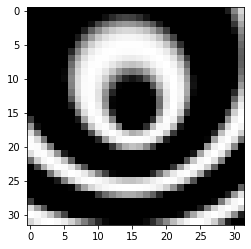

In [7]:
# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config-my-cppn')

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes,1000)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

# Show output of the most fit genome against training data.
print('\nOutput:')
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
myPic = np.empty((32,32,1))      
for i in range(32*32): 
    myPic[i%32][int(i/32)] = winner_net.activate(x[i%32][int(i/32)])
my_sigmoid(myPic)
plt.imshow(myPic, cmap='Greys_r',vmin=0, vmax=1)


 ****** Running generation 0 ****** 



-0.0

NameError: name 'myPic' is not defined